<a href="https://colab.research.google.com/github/phandangthoai/Comparison-Performance-of-Spectrogram-and-Scalogram-as-Input-of-Acoustic-Recognition-Task/blob/main/Comparison_Performance_of_Spectrogram_and_Scalogram_as_Input_of_Acoustic_Recognition_Task_Release_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook includes source codes used for development of the research named as the title. Below is the end-to-end steps for processing audio data and perform recognition task.

In [ ]:
# Install the library for downloading files from internet
!pip install wget

In [ ]:
# Download audio dataset
import wget
url = "https://zenodo.org/records/3384388/files/6_dB_valve.zip?download=1"

In [ ]:
wget.download(url, '/content/6_dB_valve.zip')

In [ ]:
# Extract audios from zip file

# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/6_dB_valve.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

In [ ]:
# This library used for copy and delete files and folders as examples below
import shutil

In [ ]:
src_path = '/content/drive/MyDrive/MIMII_data/6dB/valve/id_00/normal'
dst_path = '/content/6dB/valve/id_00/normal'
shutil.copytree(src_path, dst_path)
print('Copied')

Copied


In [ ]:
src_path = '/content/drive/MyDrive/MIMII_data/6dB/valve/id_00/abnormal'
dst_path = '/content/6dB/valve/id_00/abnormal'
shutil.copytree(src_path, dst_path)
print('Copied')

Copied


In [ ]:
# This code used to count files after copy
import os
directory = '/content/6dB/valve/id_00/normal'
lst = os.listdir(directory) # your directory path
number_files = len(lst)
print(number_files)

991


In [ ]:
# Library for spectrogram generation
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pathlib

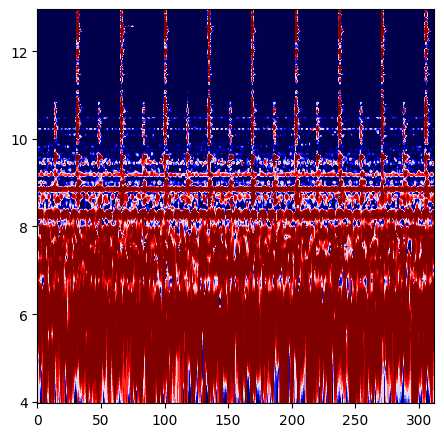

In [ ]:
# Spectrogram generation drawn in contourlevel
# import time #Time for measuring computational expense

dir_path = '/content/6dB/valve/id_00'
FRAME_SIZE = 1024
HOP_SIZE = 512
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
types = 'normal abnormal'.split()
for g in types:
    pathlib.Path(f'{dir_path}/sp_6dBValve00_512_512/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'{dir_path}/{g}'):
        # plt.clf()
        # start_time = time.time()
        sound = f'{dir_path}/{g}/{filename}'
        y, sr = librosa.load(sound, sr=None, mono=True, duration=10)
        y = y/max(abs(y)) #normalize sound
        Y_stft = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
        Y_spec_dB = librosa.power_to_db(np.abs(Y_stft) ** 2) # spectrogram in dB
        time_dim = np.arange(0, Y_spec_dB.shape[1])
        fig, ax = plt.subplots(figsize=(5.12, 5.12))
        freq_dim = np.log2(sr/(FRAME_SIZE/2+1)/2*np.arange(1, FRAME_SIZE/2+2)) #frequency dimension in logarithmic scale
        im = ax.contourf(time_dim, freq_dim, Y_spec_dB, contourlevels, extend='both',cmap=cmap)
        # print("--- %s seconds ---" % (time.time() - start_time))
        break # use this for generation one file
        plt.axis('off')
        plt.savefig(f'{dir_path}/sp_6dBValve00_512_512/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
        plt.close()
    break # use this for generation one file

In [ ]:
# Pywavelets library for scalogram generation
import pywt

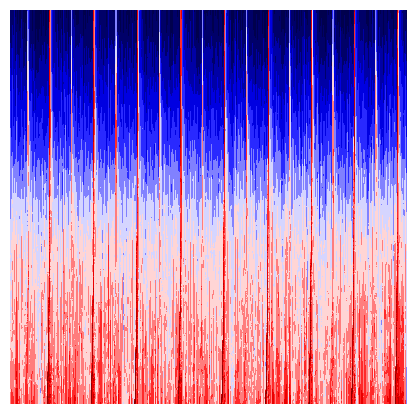

In [ ]:
# Generation spectrogram
dir_path = '/content/6dB/valve/id_00'
scales = np.arange(2, 129)
amp_factor = 10
waveletname = 'cmor'
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
types = 'normal abnormal'.split()
for g in types:
  pathlib.Path(f'{dir_path}/Sc_6dBValve00_512_512/{g}').mkdir(parents=True, exist_ok=True)
  for filename in os.listdir(f'{dir_path}/{g}'):
      # plt.clf()
      sound = f'{dir_path}/{g}/{filename}'
      y, sr = librosa.load(sound, sr=None, mono=True, duration=10)
      y = amp_factor*y/max(abs(y)) #standardize sound
      dt=1/sr
      time_dim = np.arange(0, y.shape[0])
      [coefficients, frequencies] = pywt.cwt(y, scales, waveletname, dt)
      power = (abs(coefficients)) ** 2
      fig, ax = plt.subplots(figsize=(5.12, 5.12))
      freq_dim = np.log2(frequencies)
      im = ax.contourf(time_dim, freq_dim, np.log2(power), contourlevels, extend='both',cmap=cmap)
      plt.axis('off')
      break # use this break to generate one file only
      plt.savefig(f'{dir_path}/Sc_6dBValve00_512_512/{g}/{filename[:-3].replace(".", "")}.png')
      plt.clf()
      plt.close()
  break # use this break to generate one file only

In [ ]:
# Library for CNNs implementation
import tensorflow as tf
import keras

In [ ]:
import shutil

In [ ]:
# Used to copy spectrogram and scalogram if it is generated somwhere
src_path = '/content/drive/MyDrive/MIMII_data/6dB/valve/id_00/Sc_6dBValve00_128_amp_8_15_10'
dst_path = '/content/Sc_6dBValve00_128_amp_8_15_10'
shutil.copytree(src_path, dst_path)
print('Copied')

Copied


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Training and validation for acoustic recognition task
batch_size = 64
img_height = 512
img_width = 512
data_dir = '/content/Sc_6dBValve00_128_amp_8_15_10'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    label_mode = 'categorical',
    class_names = ('normal', 'abnormal'),
    color_mode = "rgb",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    label_mode = 'categorical',
    class_names = ('normal', 'abnormal'),
    color_mode = "rgb",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

num_classes = 2

metrics = [
           'accuracy',
           tf.keras.metrics.AUC(
              num_thresholds=200, curve='ROC',
              summation_method='interpolation', name='AUC_ROC', dtype=None,
              thresholds=None, multi_label=False,
              num_labels=None,
              label_weights=None,
              from_logits=False),
           tf.keras.metrics.Precision(
              thresholds=None, top_k=None,
              class_id=None, name=None, dtype=None),
           tf.keras.metrics.Recall(
              thresholds=None, top_k=None, class_id=None,
              name=None, dtype=None)
]

model = tf.keras.Sequential([
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.Conv2D(16, 3, activation='relu', use_bias=True, bias_initializer='zeros'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu', use_bias=True, bias_initializer='zeros'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(64, 3, activation='relu', use_bias=True, bias_initializer='zeros'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ])
opt = tf.keras.optimizers.Adam(learning_rate=0.001,name='Adam')
model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metrics)

checkpoint_filepath = '/content/Sc_6dBValve00_128_amp_8_15_10_model_auc.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor = 'val_AUC_ROC',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    save_freq='epoch')

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=32,
    callbacks=[model_checkpoint_callback])

Found 1110 files belonging to 2 classes.
Using 888 files for training.
Found 1110 files belonging to 2 classes.
Using 222 files for validation.
Epoch 1/32
 1/14 ━━━━━━━━━━━━━━━━━━━━ 5:38 26s/step - AUC_ROC: 0.4448 - accuracy: 0.4844 - loss: 0.6998 - precision: 0.4844 - recall: 0.4844

Below is bonus for young researchers

(0.0, 9.9999375, 5.965784284662087, 11.965784284662087)

<Figure size 640x480 with 0 Axes>

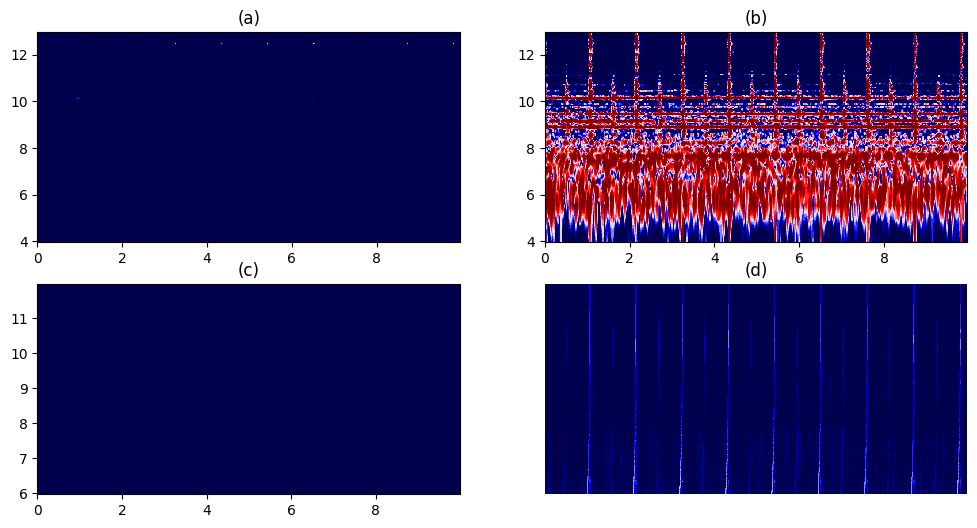

In [ ]:
# Effect of signal normalization

# CWT
scales = np.arange(2, 129)
waveletname = 'cmor'
# STFT
FRAME_SIZE = 1024
HOP_SIZE = 512
# Image attributes
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
# specify an audio file here
sound = '/content/6dB/valve/id_00/normal/00000002.wav'
y, sr = librosa.load(sound, sr=None, mono=True, duration=10)
y_normalized = y/max(abs(y)) #standardize sound
dt=1/sr
time_dim = np.arange(0, y.shape[0])
[coefficients, frequencies] = pywt.cwt(y_normalized, scales, waveletname, dt)
power = (abs(coefficients)) ** 2
plt.clf()
fig, ax = plt.subplots(2,2,figsize=(12, 6))
freq_dim = np.log2(frequencies)
im2 = ax[1][1].contourf(time_dim/16000, freq_dim, np.log2(power), contourlevels, extend='both',cmap=cmap)

[coefficients, frequencies] = pywt.cwt(y, scales, waveletname, dt)
power = (abs(coefficients)) ** 2
im3 = ax[1][0].contourf(time_dim/16000, freq_dim, np.log2(power), contourlevels, extend='both',cmap=cmap)

Y_stft = librosa.stft(y_normalized, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_spec_dB = librosa.power_to_db(np.abs(Y_stft) ** 2)
time_dim = np.arange(0, Y_spec_dB.shape[1])

freq = sr/(FRAME_SIZE/2+1)/2*np.arange(1, FRAME_SIZE/2+2)
yticks = np.log2(freq)
im0 = ax[0][1].contourf(time_dim/N*10, yticks, Y_spec_dB, contourlevels, extend='both',cmap=cmap)

Y_stft = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_spec_dB = librosa.power_to_db(np.abs(Y_stft) ** 2)
im1 = ax[0][0].contourf(time_dim/N*10, yticks, Y_spec_dB, contourlevels, extend='both',cmap=cmap)

ax[0][0].set_title(label="(a)")
plt.axis('off')
ax[0][1].set_title(label="(b)")
plt.axis('off')
ax[1][0].set_title(label="(c)")
plt.axis('off')
ax[1][1].set_title(label="(d)")
plt.axis('off')

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


<Figure size 640x480 with 0 Axes>

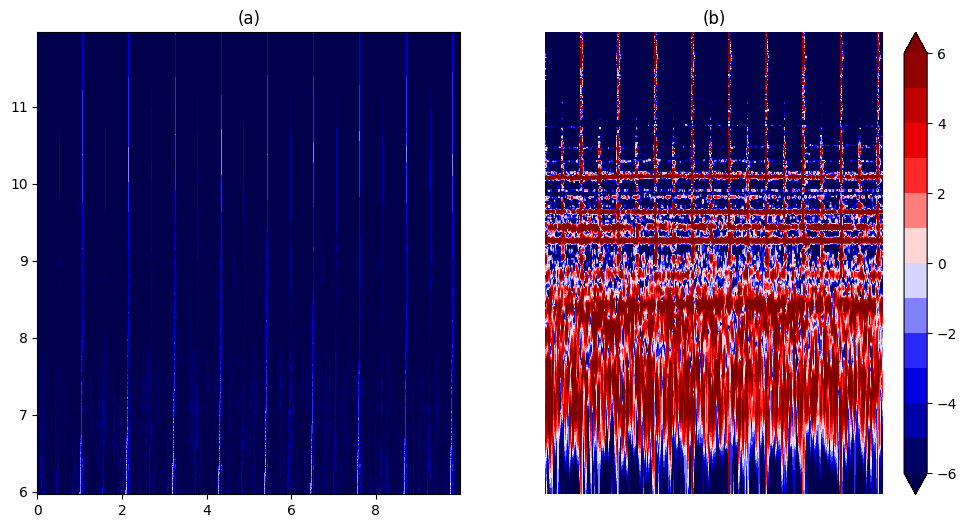

In [ ]:
# Visualize comparison of spectrogram and scalogram

# CWT
scales = np.arange(2, 129)
waveletname = 'cmor'
# STFT
FRAME_SIZE = 1024
HOP_SIZE = 512
# Image attributes
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
# specify an audio file here
sound = '/content/6dB/valve/id_00/normal/00000002.wav'
y, sr = librosa.load(sound, sr=None, mono=True, duration=10)
y = y/max(abs(y)) #standardize sound
dt=1/sr
time_dim = np.arange(0, y.shape[0])
[coefficients, frequencies] = pywt.cwt(y_normalized, scales, waveletname, dt)
power = (abs(coefficients)) ** 2
plt.clf()
fig, ax = plt.subplots(1,2,figsize=(12, 6))
freq_dim = np.log2(frequencies)
im2 = ax[0].contourf(time_dim/16000, freq_dim, np.log2(power), contourlevels, extend='both',cmap=cmap)

Y_stft = librosa.stft(y_normalized, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_spec_dB = librosa.power_to_db(np.abs(Y_stft) ** 2)
time_dim = np.arange(0, Y_spec_dB.shape[1])

freq = sr/(FRAME_SIZE/2+1)/2*np.arange(1, FRAME_SIZE/2+2)
yticks = np.log2(freq)
im0 = ax[1].contourf(time_dim/N*10, yticks, Y_spec_dB, contourlevels, extend='both',cmap=cmap)

ax[0].set_title(label="(a)")
plt.axis('off')
ax[1].set_title(label="(b)")
plt.axis('off')
plt.colorbar(im0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

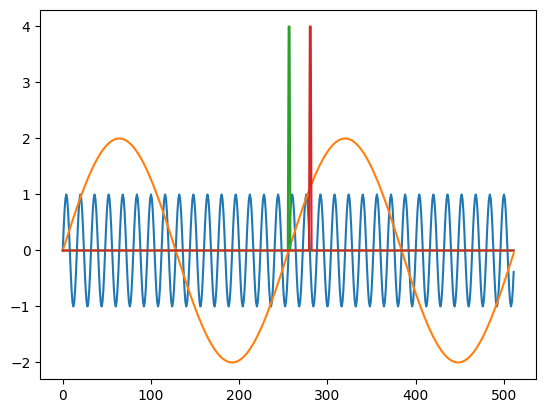

In [ ]:
# Drawing of signal for multiresolution analysis
sr = np.power(2, 14)
f1 = np.power(2, 10)
f2 = np.power(2, 6)
Npoint = np.power(2, 9)
tPoint = np.arange(0, Npoint, 1)/sr
wave1 = np.sin(2*np.pi*f1*tPoint)
plt.plot(wave1)
wave2 = 2*np.sin(2*np.pi*f2*tPoint)
plt.plot(wave2)
pulse1 = np.zeros(Npoint)
pulse1[256]=4
pulse1[257]=4
plt.plot(pulse1)
pulse2 = np.zeros(Npoint)
pulse2[280]=4
pulse2[281]=4
plt.plot(pulse2)
plt.show()

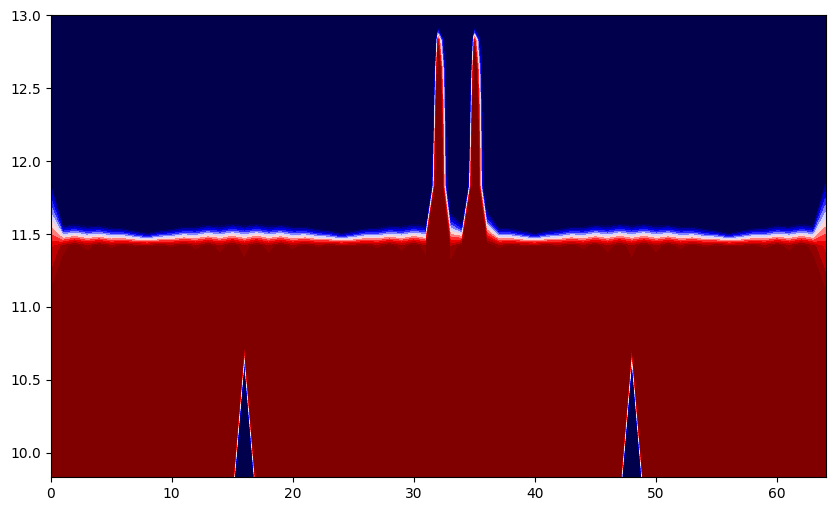

In [ ]:
# Spectrogram with short window
y = wave1+wave2+pulse1+pulse2
# STFT
FRAME_SIZE = np.power(2, 4)
HOP_SIZE = int(FRAME_SIZE/2)
# Image attributes
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)

Y_stft = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_spec_dB = librosa.power_to_db(np.abs(Y_stft) ** 2) # spectrogram in dB
time_dim = np.arange(0, Y_spec_dB.shape[1])
fig, ax = plt.subplots(figsize=(10, 6))
freq_dim = np.log2(sr/(FRAME_SIZE/2+1)/2*np.arange(1, FRAME_SIZE/2+2)) #frequency dimension in logarithmic scale
im = ax.contourf(time_dim, freq_dim, Y_spec_dB, contourlevels, extend='both',cmap=cmap)

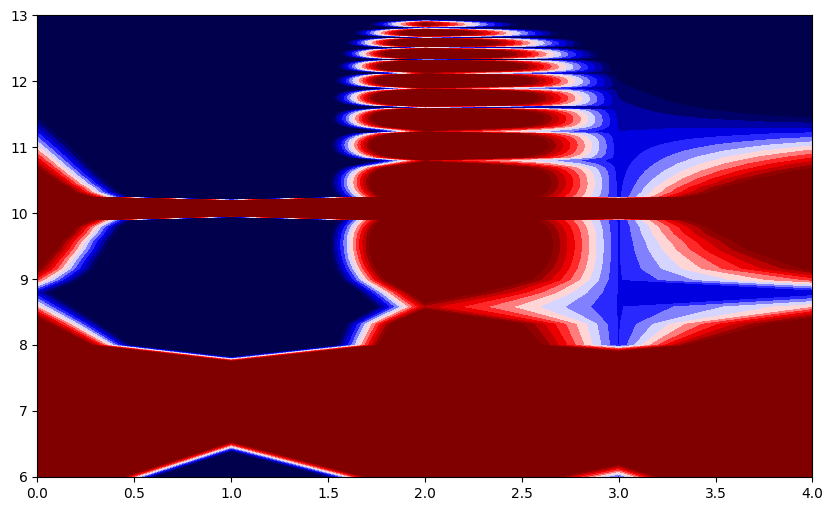

In [ ]:
# Spectrogram with long window
y = wave1+wave2+pulse1+pulse2
# STFT
FRAME_SIZE = np.power(2, 8)
HOP_SIZE = int(FRAME_SIZE/2)
# Image attributes
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)

Y_stft = librosa.stft(y, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_spec_dB = librosa.power_to_db(np.abs(Y_stft) ** 2) # spectrogram in dB
time_dim = np.arange(0, Y_spec_dB.shape[1])
fig, ax = plt.subplots(figsize=(10, 6))
freq_dim = np.log2(sr/(FRAME_SIZE/2+1)/2*np.arange(1, FRAME_SIZE/2+2)) #frequency dimension in logarithmic scale
im = ax.contourf(time_dim, freq_dim, Y_spec_dB, contourlevels, extend='both',cmap=cmap)

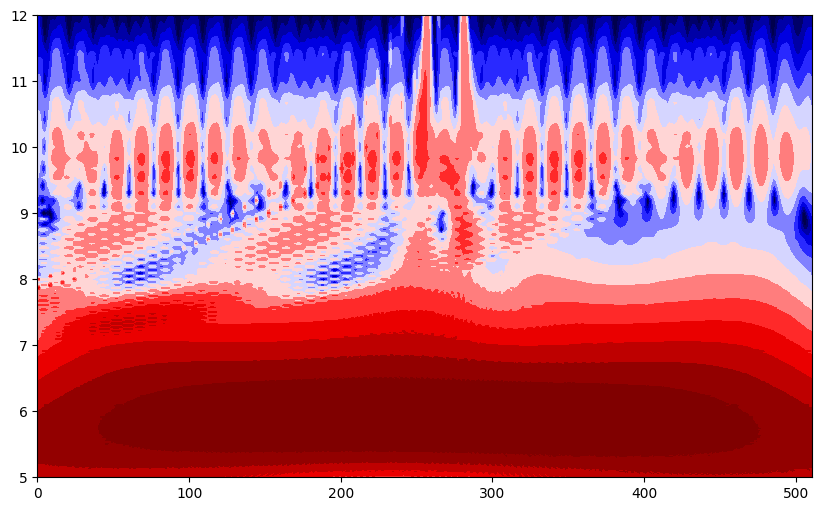

In [ ]:
# scalogram generation
scales = np.arange(2, 257)
amp_factor = 5
waveletname = 'cmor'
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
y = amp_factor*y/max(abs(y)) #standardize sound
dt=1/sr
time_dim = np.arange(0, y.shape[0])
[coefficients, frequencies] = pywt.cwt(y, scales, waveletname, dt)
power = (abs(coefficients)) ** 2
fig, ax = plt.subplots(figsize=(10, 6))
freq_dim = np.log2(frequencies)
im = ax.contourf(time_dim, freq_dim, np.log2(power), contourlevels, extend='both',cmap=cmap)